<a id='top'></a>

# TransferRoom Analysis
##### Data analysis notebook to produce player recommendations for two example club ads for [TransferRoom](https://www.transferroom.com/).

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 04/01/2022<br>
Notebook last updated: 06/01/2022

![TransferRoom](../../../img/logos/transfer-room-logo.jpeg)

Click [here](#section8) to jump straight to the Recruitment Analysis section and skip the [Notebook Brief](#section2), [Data Sources](#section3), [Data Engineering](#section4), [Machine Learning](#section5), [Data Visualisation](#section6), and [Data Analysis](#section7) sections. Or skip straight to the [Summary](#section9).

___

<a id='sectionintro'></a>

## <a id='import_libraries'>Introduction</a>
This notebook is an case study of how to use data analysis to produce player recommendations for two example club ads for [TransferRoom](https://www.transferroom.com/). The findings are to be present in a presentation. The data is analysed using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames and [matplotlib](https://matplotlib.org/stable/index.html) for data visualisation.

For more information about this notebook and the author, I am available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/); and
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster).

The GitHub repository for this notebook can be found [here](https://github.com/eddwebster/football_analytics), a static version of this notebook can be found [here](https://nbviewer.org/github/eddwebster/football_analytics/blob/master/notebooks/5_data_analysis_and_projects/player_similarity_and_clustering/PCA%20and%20K-Means%20Clustering%20of%20%27Piqu%C3%A9-like%27%20Defenders%20for%20Parma%20Calcio%201913.ipynb), and an accompanying slide deck can be found [here](https://docs.google.com/presentation/d/1P8Ae7Bcv3VxXEC-serbn3qCLuprZ0UDfhFxqWeO_3eo/edit?usp=sharing).

A set of Tableau dashboards derived from the StatsBomb 2018 World Cup data that was subsequently not used as the basis for this analysis but can nevertheless be found [here](https://public.tableau.com/app/profile/edd.webster/viz/EddWebsterParmaCalcio1913-WorldCup2018CenterBackAnalysisandDashboards/WC2018PlayerDashboard?publish=yes), the data of which is derived from my [StatsBomb Data Parsing](https://github.com/eddwebster/football_analytics/blob/master/notebooks/2_data_parsing/Parma%20Calcio%201913%20-%20StatsBomb%20Data%20Parsing.ipynb) and [StatsBomb Data Engineering](https://github.com/eddwebster/football_analytics/blob/master/notebooks/3_data_engineering/Parma%20Calcio%201913%20-%20StatsBomb%20Data%20Engineering.ipynb) notebooks.

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [About This Notebook](#section2)<br>
      1.    [Notebook Brief](#section2.1)<br>
      2.    [Methodology](#section2.2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Datasets Used](#section3.1)<br>
      2.    [Reason for Data Selection](#section3.2)<br>
      3.    [Data Dictionary](#section3.3)<br>
      4.    [Import CSV File as a pandas DataFrames](#section3.4)<br>
      5.    [Preliminary Data Handling](#section3.5)<br>
            1.    [Summary Report](#section3.5.1)<br>
            2.    [Further Inspection](#section3.5.2)<br>
4.    [Data Engineering](#section4)<br>
      1.    [Assign Raw DataFrame to a New DataFrame for Engineering](#section4.1)<br>
      2.    [Creation of 'Per 90' (p90) Stats](#section4.2)<br>
      3.    [Subset Data](#section4.3)<br>
      4.    [Select Numerical and String Columns](#section4.4)<br>
      5.    [Replace Nulls](#section4.5)<br>
5.    [Exploratory Data Analysis](#section5)<br>
6.    [Recruitment Analysis](#section6)<br>
      1.    [Metrics of Interest](#section6.1)<br>
      2.    [Radars](#section6.2)<br>
      3.    [Recruitment Shortlist Data Deep-Dive](#section6.3)<br>
            1.    [PLAYER 1](#section6.3.1)<br>
            2.    [PLAYER 2](#section6.3.1)<br>
            3.    [PLAYER 3](#section6.3.1)<br>
      4.    [Data-Driven Recommendations](#section6.4)<br>
7.    [Export Final Dataset](#section7)<br>      
8.    [Summary](#section8)<br>
9.    [Next Steps](#section9)<br>
10.    [References](#section10)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations.

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [1]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd
import pandas_profiling as pp
import os
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno
import soccerplots
from soccerplots.radar_chart import Radar   # for custom radar visuals

# Progress Bar
from tqdm import tqdm

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Print Statement
print('Setup Complete')

Setup Complete


In [2]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))

Python: 3.7.6
NumPy: 1.20.3
pandas: 1.3.2
matplotlib: 3.4.2


### Define Filepaths

In [3]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', '..')
data_dir = os.path.join(base_dir, 'data')
data_dir_tr = os.path.join(base_dir, 'data', 'transfer-room')
data_dir_export = os.path.join(base_dir, 'data', 'export')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')

### Defined Variables

In [4]:
# Defined Variables

## Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Custom Functions

In [5]:
# Custom Functions

## Define function for creating a two player radar
def create_2p_radar(df,
                    player_1_name='Gerard Pique',
                    player_1_season='2018/2019',
                    player_1_colour='blue', 
                    player_1_team='Barcelona',
                    player_2_name='n/a',
                    player_2_season='2020/2021',
                    player_2_colour='red',
                    player_2_team='n/a'
                   ):
    
    """
    Function to create a two player radar, based on the soccerplots
    library, a Python package that can be used for making visualisations 
    for football analytics by Anmol Durgapal (@slothfulwave612).
    """
    
    ## Select only the players we wish to compare
    lst_players = [player_1_name, player_2_name]

    
    ## Filter DataFrame to only have the two players of interest
    
    ### Player 1 
    df_radar_player_1 = df[(df['player_name_fbref'] == player_1_name) &
                           (df['season'] == player_1_season)
                          ]
    
    ### Player 2 
    df_radar_player_2 = df[(df['player_name_fbref'] == player_2_name) &
                           (df['season'] == player_2_season)
                          ]
    
    ### Union two DataFrames together
    df_radar = pd.concat([df_radar_player_1, df_radar_player_2])
    
    
    ## Define list of columns for radar
    lst_cols_radar = ['player_name_fbref',
                      'season',
                      'Cmp_p90',
                      'Prog_p90',
                      'Cmp%',
                      'Press_p90',
                      'Carries_p90',
                      'PrgDist_p90',
                      'TotDist_p90',
                      'npxG_p90',
                      'xA_p90',
                      'SCA_p90',
                      'Tkl%',
                      'Won%'
                     ]
    
    ## Select only columns of interest for radar
    df_radar = df_radar[lst_cols_radar]

    
    ## Rename columns
    df_radar.columns=['player_name_fbref',
                      'Season',
                      'Completed Passes',
                      'Progressive Passes',
                      'Pass Completion%',
                      'Pressured Passes',
                      'Carries',
                      'Progressive Carry Distance',
                      'Total Carry Distance',
                      'npxG',
                      'xA',
                      'Shot Creating Actions',
                      'Dribblers Tackled%',
                      'Aerial Win%'
                     ] 
    
    ## Reset index
    df_radar = df_radar.reset_index(drop=True)

    
    ## Radar visualisation
    
    ### Get parameters
    params = list(df_radar.columns)
    params = params[2:]
    
    ### Add ranges to list of tuple pairs
    ranges = []
    a_values = []
    b_values = []
    
    ###
    for x in params:
        a = min(df_radar[params][x])
        a = a - (a*.25)

        b = max(df_radar[params][x])
        b = b + (b*.25)

        ranges.append((a, b))

    ###
    for x in range(len(df_radar['player_name_fbref'])):
        if df_radar['player_name_fbref'][x] == player_1_name:
            a_values = df_radar.iloc[x].values.tolist()
        if df_radar['player_name_fbref'][x] == player_2_name:
            b_values = df_radar.iloc[x].values.tolist()
    
    ###
    a_values = a_values[2:]
    b_values = b_values[2:]

    ###
    values = [a_values, b_values]

    ###
    title = dict(title_name = player_1_name,
                 title_color = player_1_colour,
                 subtitle_name = player_1_season,
                 subtitle_color = player_1_colour,
                 title_name_2 = player_2_name,
                 title_color_2 = player_2_colour,
                 subtitle_name_2 = player_2_season,
                 subtitle_color_2 = player_2_colour,
                 title_fontsize = 18,
                 subtitle_fontsize=15
                )

    ### End note
    endnote = '@eddwebster\ndf_radarvia FBref / Statsbomb'
    
    ### Define fonts and colours
    background='#f7f7f7'    #'#313233'
    mpl.rcParams.update(mpl.rcParamsDefault)
    
    ###
    radar = Radar()

    ### Create figure
    fig, ax = radar.plot_radar(ranges=ranges,
                               params=params,
                               values=values,
                               radar_color=[player_1_colour, player_2_colour],
                               alphas=[0.5, 0.5],
                               title=title,
                               endnote=endnote,
                               compare=True
                              )
    
    ### Change background colour
    fig.set_facecolor(background)

In [6]:
## Define function for creating Percentile Rank horizontal bar charts
def create_pr_bar_chart(df,
                        season='2020/2021',
                        player_name='Gerard Pique',
                        player_colour='#1B4094'
                       ):
    
    """
    Function to create a 12-metric percentile rank bar chart for 
    an individual player.
    """
    
    ## Filter dataset for player
    df_player_pr = df[(df['player_name_fbref'] == player_name) &
                      (df['season'] == season)
                     ]
    ##
    lst_cols_pr = ['Cmp_p90_PR',
                   'Prog_p90_PR',
                   'Cmp%_PR',
                   'Press_p90_PR',
                   'Carries_p90_PR',
                   'PrgDist_p90_PR',
                   'TotDist_p90_PR',
                   'npxG_PR',
                   'xA_PR',
                   'SCA_p90_PR',
                   'Tkl%_PR',
                   'Won%_PR'
                  ]

    ## Select columns of interest
    df_player_pr = df_player_pr[lst_cols_pr]

    # Reset index
    df_player_pr = df_player_pr.reset_index(drop=True)

    # Transpose DataFrame
    df_player_pr_t = df_player_pr.T

    # Reset index
    df_player_pr_t = df_player_pr_t.reset_index(drop=False)

    # Rename Columns
    df_player_pr_t.columns = ['Metric', 'PR']

    # Dictionary of Stats to Rename
    dict_metrics = {'Cmp_p90_PR': 'Completed Passes',
                    'Prog_p90_PR': 'Progressive Passes',
                    'Cmp%_PR': 'Pass Completion%',
                    'Press_p90_PR': 'Pressured Passes',
                    'Carries_p90_PR': 'Carries',
                    'PrgDist_p90_PR': 'Progressive Carry Distance',
                    'TotDist_p90_PR': 'Total Carry Distance',
                    'npxG_PR': 'npxG',
                    'xA_PR': 'xA',
                    'SCA_p90_PR': 'Shot Creating Actions',
                    'Tkl%_PR': 'Dribblers Tackled%',
                    'Won%_PR': 'Aerial Win%'
                   }

    # Map grouped positions to DataFrame
    df_player_pr_t['Metric'] = df_player_pr_t['Metric'].map(dict_metrics)

    # Percentile Rank Bar Chart

    ## Define fonts and colours
    #title_font = 'Alegreya Sans'
    #main_font = 'Open Sans'
    background='#f7f7f7'    #'#313233'
    title_colour='black'
    text_colour='black'
    mpl.rcParams.update(mpl.rcParamsDefault)
    mpl.rcParams['xtick.color'] = text_colour
    mpl.rcParams['ytick.color'] = text_colour
    mpl.rcParams.update({'font.size': 18})

    # Define labels and metrics
    metric = df_player_pr_t['Metric']
    pr = df_player_pr_t['PR']

    ## Create figure 
    fig, ax = plt.subplots(figsize =(16, 16))
    fig.set_facecolor(background)
    ax.patch.set_facecolor(background)

    # Create Horizontal Bar Plot
    ax.barh(metric,
            pr,
            color=player_colour,
            alpha=0.75
           )

    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad=2)
    ax.yaxis.set_tick_params(pad=20)

    # Add X, Y gridlines
    ax.grid(b=True,
            color='grey',
            linestyle='-.',
            linewidth=0.5,
            alpha=0.2
           )

    # Show top values
    ax.invert_yaxis()

    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.015, i.get_y()+0.4,
                 str(round((100* i.get_width()), 1)) + '%',
                 fontsize=18,
                 fontweight='regular',
                 color ='black'
                )

    # Add Plot Title
    fig.text(0.05,
             1,
             f'How Does {player_name} Compare Against Fellow Defenders?',
             fontsize=35,
             fontweight='bold',
            #fontfamily='DejaVu Sans', 
             color=text_colour
            )

    # Add Plot Subtitle
    fig.text(0.05,
             0.975,
             'A comparison of the center back\'s metrics against competitors in the \'Big 5\' European Leagues.',
             fontsize=25,
             fontweight='regular',
            #fontfamily='DejaVu Sans',
             color=text_colour
            )

    # Verticle line
    ax.axvline(0.5,
               0,
               0.952,
               color='#FFD200',
               linestyle='--',
               linewidth=3
              )

    """
    # Add Text watermark
    fig.text(0.9,
             0.15,
             '@eddwebster',
             fontsize=12,
             color='grey',
             ha='right',
             va='bottom',
             alpha=0.7
            )
    """

    # Footnote
    plt.figtext(0.19,
                -0.07,
                'Created by Edd Webster / @eddwebster. Data provided by FBref via StatsBomb. Dataset limited to \ncenter backs who have played in the \'Big 5\' European leagues between the 17/18 and 20/21 season.\nAttacking metrics standardised per 90 minutes.\n',
                ha="left",
                fontsize=20
               )

    # Convert X axis to percentages
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])

    ## Save figure
    plt.savefig(fig_dir + f'/{player_name}_pr.png', bbox_inches='tight', dpi=300)

    ## Show plt
    plt.tight_layout()
    plt.show()

### Notebook Settings

In [7]:
# Display all columns of pandas DataFrames
pd.set_option('display.max_columns', None)

---

<a id='section2'></a>

## <a id='#section2'>2. About This Notebook</a>

<a id='section2.1'></a>

### <a id='#section2.1'>2.1. Instructions</a>
The emailed brief for this task is as follows:
>[TransferRoom](https://www.transferroom.com/) is football's number one market place.
>
>Clubs can create ads for the players they are looking for in the upcoming transfer window. 
>
>Ads allow clubs to share requirements in terms of position, age, fees and salary limits.
>
>What we want you to do is to find 3 players that are the best recommendations for the following 2 ads, which we would then automatically suggest on the platform
>
>It's important to think about what factors make a good recommendation for the buying club
>
>It's also important to consider and explain how your approach could be scaled to work practically for hundreds or even thousands of adverts. We cannot spend hours looking at a certain advert in granular detail.
>
>**Ad 1**<br>
>*    Team: Barnsley FC<br>
>*    Type: Loan<br>
>*    Position: Left Back<br>
>*    Monthly loan budget including gross salary: 500,000 GBP<br>
>*    Age: any<br>
>
>**Ad 2**<br>
>*    Team: D.C. United<br>
>*    Type: 	Buy <br>
>*    Position: Forward<br>
>*    Transfer Fee (Annual Gross Salary): 5,000,000 USD (salary 2,000,000 USD)<br>
>*    Age		20-30<br>
>
>We then want you to create and give a 5-10 minute presentation explaining your approach and findings.
>Please email your completed presentation to jess@transferroom.com prior to your interview.

<a id='section2.2'></a>

### <a id='#section2.2'>2.2. Methodology</a>
>The players tab contains information on a selection of players - covering basic information, plus estimations of transfer fee and wages (where available),  and the percentage of possible minutes they've played recently.
>
>For every player you also have performance data on the most recent season in which they played more than 1000 minutes
>
>The transfer paths tab contains information on which leagues a league typical signs players from, as a percentage of their total transfers.
>
>For example, row 2 shows that 20% of transfers into Serie A are loan deals also from Serie A, and row 7 shows that 2.6% of transfers into Serie and permanent deals from the Premier League.

<a id='section2.3'></a>

### <a id='#section2.3'>2.3. Notebook Conventions</a>
*    Variables that refer a `DataFrame` object are prefixed with `df_`.
*    Variables that refer to a collection of `DataFrame` objects (e.g., a list, a set or a dict) are prefixed with `dfs_`.

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>

<a id='section3.1'></a>

### <a id='#section3.1'>3.1. Import Excel File as pandas DataFrames</a>
Using the [`read.excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html) method

In [22]:
# Import Excel files as a pandas DataFrame
df_players_raw = pd.read_excel(os.path.join(data_dir_tr, 'original', 'TransferRoom Data Task.xlsx'), sheet_name='Players', header=1, index_col=0)
df_transfers_raw = pd.read_excel(os.path.join(data_dir_tr, 'original', 'TransferRoom Data Task.xlsx'), sheet_name='transfer paths', header=0, index_col=0)  

In [24]:
df_players_raw

,ShortName,age,nationality,first_position,second_position,preferred_foot,expected_transfer_cost_euros,est_weekly_wages_euro,parent_squad,current_squad,recent_mins_played_percentage,season,StartDate,EndDate,competition,country,TotalMinutesOnField,TotalGoals,TotalAssists,TotalShots,totalheadshots,TotalDuels,TotalDuelsWon,TotalDefensiveDuels,TotalDefensiveDuelsWon,TotalAerialDuels,TotalAerialDuelsWon,TotalPasses,TotalSuccessfulPasses,TotalPassesToFinalThird,TotalSuccessfulPassesToFinalThird,TotalCrosses,TotalSuccessfulCrosses,TotalDribbles,TotalSuccessfulDribbles,TotalInterceptions,TotalShotAssists,TotalRecoveries,TotalOpponentHalfRecoveries,totalxG,totalxA
playerid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1686,Gonzalo Higuaín,34,Argentina,Forward,NaN,right,1400000,150000.0,Inter Miami CF,Inter Miami CF,0.816476,2021,2021-04-17,2021-12-11,MLS,United States,2536,12,7,79,3,468,182,89,47,35,11,650,511,105,64,17,8,100,75,41,31,50,37,11.45,4.17
1688,Cristián Zapata,35,Colombia,Centre Back,Right Back,right,300000,50000.0,Club Atlético San Lorenzo de Almagro,Club Atlético San Lorenzo de Almagro,0.703433,2021,2021-02-12,2021-12-14,Superliga,Argentina,1501,1,1,11,9,265,171,103,73,89,59,641,556,52,32,3,0,10,8,80,0,192,14,1.29,0.00
1689,Pepe Reina,39,Spain,Goalkeeper,NaN,right,200000,90000.0,SS Lazio,SS Lazio,0.732357,2021/2022,2021-08-21,2022-05-22,Serie A,Italy,1452,0,1,0,0,9,6,4,2,4,3,375,334,21,11,0,0,1,1,12,1,48,0,0.00,0.08
1690,Suso,28,Spain,Winger,Attacking Midfielder,left,21000000,70000.0,Sevilla FC,Sevilla FC,0.328284,2020/2021,2020-09-12,2021-06-01,La Liga,Spain,2217,3,4,43,0,297,135,86,30,32,7,1184,984,650,493,74,25,112,84,33,30,35,13,1.90,10.37
1691,Ricardo Rodríguez,29,Switzerland,Left Back,Centre Back,left,4800000,70000.0,Torino FC,Torino FC,0.677572,2020/2021,2020-09-19,2021-06-01,Serie A,Italy,1310,0,0,12,0,129,83,101,69,35,21,716,624,172,130,20,3,8,4,76,1,84,15,0.72,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557305,Sergio Castel,26,Spain,Forward,NaN,right,950000,NaN,UD Ibiza,UD Ibiza,0.508591,2021/2022,2021-08-13,2022-05-29,La Liga 2,Spain,1595,4,1,40,12,504,189,86,52,88,31,247,180,16,10,40,17,64,44,31,13,42,28,6.24,2.02
558160,Luifer Hernández,20,Venezuela,Central Midfielder,NaN,both,350000,NaN,Academia Puerto Cabello,Academia Puerto Cabello,0.522080,2021,2021-04-11,2021-12-11,Primera División,Venezuela,1719,6,1,51,6,417,155,71,41,108,37,397,304,57,40,23,3,83,58,37,15,55,32,6.03,1.31
558164,Miguel Silva,21,Venezuela,Goalkeeper,NaN,right,150000,NaN,Academia Puerto Cabello,Academia Puerto Cabello,0.143775,2021,2021-04-11,2021-12-11,Primera División,Venezuela,1280,0,0,0,0,21,18,1,0,14,14,222,179,42,24,0,0,0,0,13,0,60,0,0.00,0.00


In [23]:
df_transfers_raw

,from_competition,from_divisionlevel,to_country,to_competition,to_division_level,transfer_type,perc_of_to_comp_total_transfers
from_country,,,,,,,
Italy,Serie A,1,Italy,Serie A,1,Loan,0.202738
Italy,Serie A,1,Italy,Serie A,1,Transfer,0.188520
Italy,Campionato Primavera 1,6,Italy,Serie A,1,Transfer,0.078989
Italy,Serie C,3,Italy,Serie A,1,Transfer,0.068457
Italy,Serie B,2,Italy,Serie A,1,Transfer,0.053712
...,...,...,...,...,...,...,...
United States,MLS,1,United States,NISA,0,Loan,0.025641
Spain,La Liga,1,United States,NISA,0,Transfer,0.025641
Bolivia,LFPB,1,United States,NISA,0,Loan,0.025641


<a id='section3.2'></a>

### <a id='#section3.2'>3.2. Preliminary Data Handling</a>

First check the quality of the dataset by looking first and last rows in pandas using the [`head()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [`tail()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [26]:
# Display the first five rows of the raw DataFrame, df_players_raw
df_players_raw.head()

,ShortName,age,nationality,first_position,second_position,preferred_foot,expected_transfer_cost_euros,est_weekly_wages_euro,parent_squad,current_squad,recent_mins_played_percentage,season,StartDate,EndDate,competition,country,TotalMinutesOnField,TotalGoals,TotalAssists,TotalShots,totalheadshots,TotalDuels,TotalDuelsWon,TotalDefensiveDuels,TotalDefensiveDuelsWon,TotalAerialDuels,TotalAerialDuelsWon,TotalPasses,TotalSuccessfulPasses,TotalPassesToFinalThird,TotalSuccessfulPassesToFinalThird,TotalCrosses,TotalSuccessfulCrosses,TotalDribbles,TotalSuccessfulDribbles,TotalInterceptions,TotalShotAssists,TotalRecoveries,TotalOpponentHalfRecoveries,totalxG,totalxA
playerid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1686,Gonzalo Higuaín,34,Argentina,Forward,NaN,right,1400000,150000.0,Inter Miami CF,Inter Miami CF,0.816476,2021,2021-04-17,2021-12-11,MLS,United States,2536,12,7,79,3,468,182,89,47,35,11,650,511,105,64,17,8,100,75,41,31,50,37,11.45,4.17
1688,Cristián Zapata,35,Colombia,Centre Back,Right Back,right,300000,50000.0,Club Atlético San Lorenzo de Almagro,Club Atlético San Lorenzo de Almagro,0.703433,2021,2021-02-12,2021-12-14,Superliga,Argentina,1501,1,1,11,9,265,171,103,73,89,59,641,556,52,32,3,0,10,8,80,0,192,14,1.29,0.00
1689,Pepe Reina,39,Spain,Goalkeeper,NaN,right,200000,90000.0,SS Lazio,SS Lazio,0.732357,2021/2022,2021-08-21,2022-05-22,Serie A,Italy,1452,0,1,0,0,9,6,4,2,4,3,375,334,21,11,0,0,1,1,12,1,48,0,0.00,0.08
1690,Suso,28,Spain,Winger,Attacking Midfielder,left,21000000,70000.0,Sevilla FC,Sevilla FC,0.328284,2020/2021,2020-09-12,2021-06-01,La Liga,Spain,2217,3,4,43,0,297,135,86,30,32,7,1184,984,650,493,74,25,112,84,33,30,35,13,1.90,10.37
1691,Ricardo Rodríguez,29,Switzerland,Left Back,Centre Back,left,4800000,70000.0,Torino FC,Torino FC,0.677572,2020/2021,2020-09-19,2021-06-01,Serie A,Italy,1310,0,0,12,0,129,83,101,69,35,21,716,624,172,130,20,3,8,4,76,1,84,15,0.72,0.32


In [27]:
# Display the last five rows of the raw DataFrame, df_players_raw
df_players_raw.tail()

,ShortName,age,nationality,first_position,second_position,preferred_foot,expected_transfer_cost_euros,est_weekly_wages_euro,parent_squad,current_squad,recent_mins_played_percentage,season,StartDate,EndDate,competition,country,TotalMinutesOnField,TotalGoals,TotalAssists,TotalShots,totalheadshots,TotalDuels,TotalDuelsWon,TotalDefensiveDuels,TotalDefensiveDuelsWon,TotalAerialDuels,TotalAerialDuelsWon,TotalPasses,TotalSuccessfulPasses,TotalPassesToFinalThird,TotalSuccessfulPassesToFinalThird,TotalCrosses,TotalSuccessfulCrosses,TotalDribbles,TotalSuccessfulDribbles,TotalInterceptions,TotalShotAssists,TotalRecoveries,TotalOpponentHalfRecoveries,totalxG,totalxA
playerid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
557305,Sergio Castel,26,Spain,Forward,NaN,right,950000,NaN,UD Ibiza,UD Ibiza,0.508591,2021/2022,2021-08-13,2022-05-29,La Liga 2,Spain,1595,4,1,40,12,504,189,86,52,88,31,247,180,16,10,40,17,64,44,31,13,42,28,6.24,2.02
558160,Luifer Hernández,20,Venezuela,Central Midfielder,NaN,both,350000,NaN,Academia Puerto Cabello,Academia Puerto Cabello,0.522080,2021,2021-04-11,2021-12-11,Primera División,Venezuela,1719,6,1,51,6,417,155,71,41,108,37,397,304,57,40,23,3,83,58,37,15,55,32,6.03,1.31
558164,Miguel Silva,21,Venezuela,Goalkeeper,NaN,right,150000,NaN,Academia Puerto Cabello,Academia Puerto Cabello,0.143775,2021,2021-04-11,2021-12-11,Primera División,Venezuela,1280,0,0,0,0,21,18,1,0,14,14,222,179,42,24,0,0,0,0,13,0,60,0,0.00,0.00
558337,Yerson Chacón,18,Venezuela,Winger,NaN,right,1400000,NaN,Deportivo Táchira FC,Deportivo Táchira FC,0.593901,2021,2021-04-11,2021-12-11,Primera División,Venezuela,2359,8,7,61,7,505,206,139,77,35,10,975,802,107,79,93,37,115,76,53,36,103,68,6.06,4.89
558344,Emerson Ruíz,18,Venezuela,Centre Back,NaN,right,150000,NaN,AC Mineros de Guayana,AC Mineros de Guayana,0.059672,2021,2021-04-11,2021-12-11,Primera División,Venezuela,1215,0,0,13,0,234,110,105,59,19,8,412,348,68,42,1,0,12,8,47,7,68,22,0.17,0.72


The unique number of players in the dataset:

In [28]:
len(df_players_raw['ShortName'].unique().tolist())

24895

The number of players that can player Left Back in the dataset, where either their first or second position is 'Left Back':

In [31]:
# Filter the DataFrame
df_players_raw_lb = df_players_raw[(df_players_raw['first_position'] == 'Left Back') | (df_players_raw['second_position']  == 'Left Back')]

# Display the DataFrame
df_players_raw_lb.head(10)

,ShortName,age,nationality,first_position,second_position,preferred_foot,expected_transfer_cost_euros,est_weekly_wages_euro,parent_squad,current_squad,recent_mins_played_percentage,season,StartDate,EndDate,competition,country,TotalMinutesOnField,TotalGoals,TotalAssists,TotalShots,totalheadshots,TotalDuels,TotalDuelsWon,TotalDefensiveDuels,TotalDefensiveDuelsWon,TotalAerialDuels,TotalAerialDuelsWon,TotalPasses,TotalSuccessfulPasses,TotalPassesToFinalThird,TotalSuccessfulPassesToFinalThird,TotalCrosses,TotalSuccessfulCrosses,TotalDribbles,TotalSuccessfulDribbles,TotalInterceptions,TotalShotAssists,TotalRecoveries,TotalOpponentHalfRecoveries,totalxG,totalxA
playerid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1691,Ricardo Rodríguez,29,Switzerland,Left Back,Centre Back,left,4800000,70000.0,Torino FC,Torino FC,0.677572,2020/2021,2020-09-19,2021-06-01,Serie A,Italy,1310,0,0,12,0,129,83,101,69,35,21,716,624,172,130,20,3,8,4,76,1,84,15,0.72,0.32
1702,Diego Laxalt,28,Uruguay,Left Back,Winger,left,4200000,80000.0,Dynamo Moscow,Dynamo Moscow,0.527395,2020/2021,2020-08-01,2021-06-01,Premiership,Scotland,1293,1,0,17,0,240,127,159,84,62,30,889,716,339,250,45,9,39,24,74,8,68,14,1.01,1.65
1706,Alessio Romagnoli,26,Italy,Centre Back,Left Back,left,12000000,150000.0,AC Milan,AC Milan,0.663138,2020/2021,2020-09-19,2021-06-01,Serie A,Italy,2033,1,1,11,0,216,141,185,116,110,76,1021,931,93,65,1,1,1,1,113,1,126,19,3.46,0.81
1708,Davide Calabria,25,Italy,Right Back,Left Back,right,27000000,90000.0,AC Milan,AC Milan,0.939181,2020/2021,2020-09-19,2021-06-01,Serie A,Italy,2807,2,1,24,0,422,253,295,182,68,36,1757,1454,607,447,67,21,69,40,152,17,197,44,1.57,3.58
1749,Mattia De Sciglio,29,Italy,Right Back,Left Back,right,3700000,150000.0,Juventus FC,Juventus FC,0.234978,2020/2021,2020-08-21,2021-06-01,Ligue 1,France,1571,0,1,3,0,253,129,103,64,36,22,860,733,112,84,37,12,31,27,100,9,168,39,0.16,1.45
1753,Giorgio Chiellini,37,Italy,Centre Back,Left Back,left,550000,150000.0,Juventus FC,Juventus FC,0.494251,2020/2021,2020-09-19,2021-06-01,Serie A,Italy,1471,0,1,5,0,179,126,143,97,66,49,1105,1023,132,99,2,0,9,8,88,3,123,27,0.69,0.50
1759,Alex Sandro,30,Brazil,Left Back,Winger,left,14000000,250000.0,Juventus FC,Juventus FC,0.706963,2021/2022,2021-08-21,2022-05-22,Serie A,Italy,1045,0,0,6,2,212,117,63,41,36,18,539,467,46,33,26,13,41,29,47,13,79,23,0.58,0.91
1764,Leonardo Spinazzola,28,Italy,Left Back,Right Back,right,21000000,150000.0,AS Roma,AS Roma,0.856332,2020/2021,2020-09-19,2021-06-01,Serie A,Italy,2244,2,4,20,0,281,143,81,47,23,12,1271,1040,496,353,94,29,140,79,93,30,101,27,1.63,7.54
1792,Riccardo Gagliolo,31,Sweden,Centre Back,Left Back,left,1500000,20000.0,US Salernitana 1919,US Salernitana 1919,0.666343,2020/2021,2020-09-19,2021-06-01,Serie A,Italy,2076,2,2,17,0,264,163,204,127,68,40,1337,1126,333,231,39,17,21,12,136,8,147,20,3.49,1.84


In [32]:
# Number of players that can play left back
len(df_players_raw_lb['ShortName'].unique().tolist())

3571

[`shape`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns a tuple representing the dimensionality of the DataFrame.

In [33]:
# Print the shape of the raw DataFrame, df_players_raw
print(df_players_raw.shape)

(25327, 41)


[`columns`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) returns the column labels of the DataFrame.

In [34]:
# Features (column names) of the raw DataFrame, df_players_raw
df_players_raw.columns

Index(['ShortName', 'age', 'nationality', 'first_position', 'second_position',
       'preferred_foot', 'expected_transfer_cost_euros',
       'est_weekly_wages_euro', 'parent_squad', 'current_squad',
       'recent_mins_played_percentage', 'season', 'StartDate', 'EndDate',
       'competition', 'country', 'TotalMinutesOnField', 'TotalGoals',
       'TotalAssists', 'TotalShots', 'totalheadshots', 'TotalDuels',
       'TotalDuelsWon', 'TotalDefensiveDuels', 'TotalDefensiveDuelsWon',
       'TotalAerialDuels', 'TotalAerialDuelsWon', 'TotalPasses',
       'TotalSuccessfulPasses', 'TotalPassesToFinalThird',
       'TotalSuccessfulPassesToFinalThird', 'TotalCrosses',
       'TotalSuccessfulCrosses', 'TotalDribbles', 'TotalSuccessfulDribbles',
       'TotalInterceptions', 'TotalShotAssists', 'TotalRecoveries',
       'TotalOpponentHalfRecoveries', 'totalxG', 'totalxA'],
      dtype='object')

The [`dtypes`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [35]:
# Displays all columns and dtypes
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_players_raw.dtypes)

ShortName                                    object
age                                           int64
nationality                                  object
first_position                               object
second_position                              object
preferred_foot                               object
expected_transfer_cost_euros                  int64
est_weekly_wages_euro                       float64
parent_squad                                 object
current_squad                                object
recent_mins_played_percentage               float64
season                                       object
StartDate                            datetime64[ns]
EndDate                              datetime64[ns]
competition                                  object
country                                      object
TotalMinutesOnField                           int64
TotalGoals                                    int64
TotalAssists                                  int64
TotalShots  

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [36]:
# Info for the raw DataFrame, df_players_raw
df_players_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25327 entries, 1686 to 558344
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   ShortName                          25327 non-null  object        
 1   age                                25327 non-null  int64         
 2   nationality                        25327 non-null  object        
 3   first_position                     25327 non-null  object        
 4   second_position                    16241 non-null  object        
 5   preferred_foot                     25327 non-null  object        
 6   expected_transfer_cost_euros       25327 non-null  int64         
 7   est_weekly_wages_euro              6378 non-null   float64       
 8   parent_squad                       25327 non-null  object        
 9   current_squad                      25327 non-null  object        
 10  recent_mins_played_percentage 

The [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to show some useful statistics for each numerical column in the DataFrame.

In [37]:
# Description of the raw DataFrame, df_players_raw, showing some summary statistics for each numberical column in the DataFrame
df_players_raw.describe()

,age,expected_transfer_cost_euros,est_weekly_wages_euro,recent_mins_played_percentage,TotalMinutesOnField,TotalGoals,TotalAssists,TotalShots,totalheadshots,TotalDuels,TotalDuelsWon,TotalDefensiveDuels,TotalDefensiveDuelsWon,TotalAerialDuels,TotalAerialDuelsWon,TotalPasses,TotalSuccessfulPasses,TotalPassesToFinalThird,TotalSuccessfulPassesToFinalThird,TotalCrosses,TotalSuccessfulCrosses,TotalDribbles,TotalSuccessfulDribbles,TotalInterceptions,TotalShotAssists,TotalRecoveries,TotalOpponentHalfRecoveries,totalxG,totalxA
count,25327.000000,2.532700e+04,6.378000e+03,24967.000000,25327.000000,25327.000000,25327.000000,25327.000000,25327.000000,25327.000000,25327.000000,25327.000000,25327.000000,25327.000000,25327.000000,25327.000000,25327.000000,25327.000000,25327.000000,25327.000000,25327.000000,25327.000000,25327.00000,25327.000000,25327.000000,25327.000000,25327.000000,25327.000000,25327.000000
mean,26.734394,1.620147e+06,2.962684e+04,0.578990,1667.847278,2.129506,1.307853,18.214633,1.897698,302.803569,149.303747,110.762151,64.611995,66.921625,32.856675,660.019386,534.489991,135.431081,89.713073,22.362814,7.035456,39.424014,25.83409,72.160145,10.582580,113.367434,29.981324,2.163277,1.619336
std,4.433324,5.833663e+06,5.556489e+04,0.278263,561.728027,3.047631,1.726304,17.217589,3.470513,158.928725,76.111574,69.559594,44.907981,56.141882,30.479427,350.825411,306.807831,123.966335,86.028039,25.606079,8.735684,38.645717,25.36985,45.188684,10.395411,73.302667,22.622625,2.666487,1.910667
min,17.000000,0.000000e+00,1.000000e+04,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.000000,51.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000e+05,1.000000e+04,0.375682,1235.000000,0.000000,0.000000,6.000000,0.000000,212.000000,106.000000,68.000000,35.000000,31.000000,12.000000,413.000000,317.000000,55.000000,34.000000,3.000000,1.000000,11.000000,8.00000,38.000000,3.000000,57.000000,14.000000,0.425000,0.280000
50%,26.000000,2.500000e+05,1.000000e+04,0.621699,1512.000000,1.000000,1.000000,13.000000,0.000000,287.000000,142.000000,101.000000,58.000000,53.000000,24.000000,580.000000,462.000000,96.000000,63.000000,13.000000,4.000000,29.000000,19.00000,63.000000,8.000000,100.000000,26.000000,1.220000,1.030000
75%,30.000000,7.500000e+05,3.000000e+04,0.807717,1962.000000,3.000000,2.000000,26.000000,2.000000,384.000000,189.000000,144.000000,85.000000,86.000000,43.000000,824.000000,675.000000,173.000000,115.000000,33.000000,10.000000,56.000000,36.00000,94.000000,15.000000,152.000000,41.000000,2.890000,2.250000
max,44.000000,1.400000e+08,1.400000e+06,1.018543,4679.000000,28.000000,17.000000,150.000000,42.000000,1475.000000,749.000000,847.000000,621.000000,944.000000,439.000000,2766.000000,2593.000000,1132.000000,829.000000,238.000000,79.000000,331.000000,239.00000,483.000000,109.000000,700.000000,238.000000,25.250000,20.610000


Next, we will check to see how many missing values we have i.e. the number of NULL values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [`missingno`](https://pypi.org/project/missingno/) library (pip install missingno).

<AxesSubplot:>

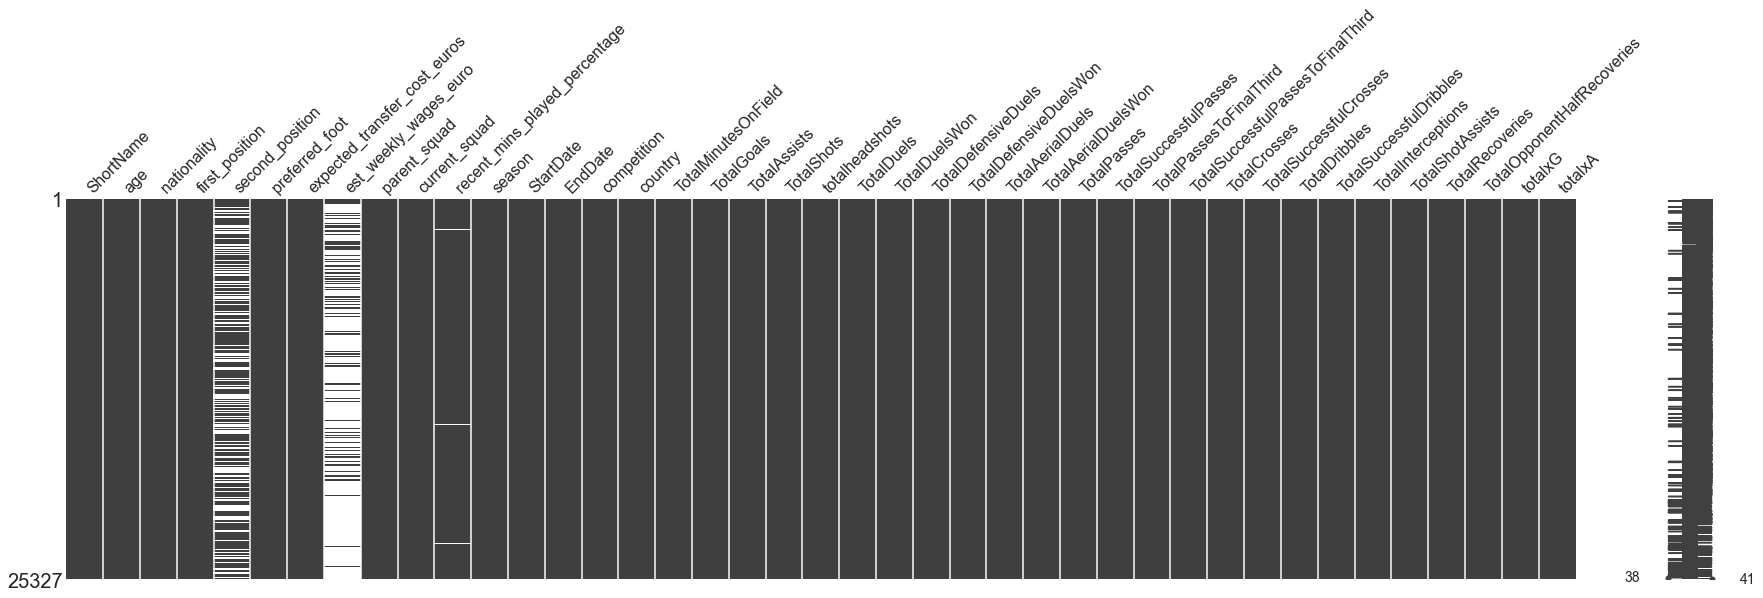

In [38]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_players_raw
msno.matrix(df_players_raw, figsize = (30, 7))

In [39]:
# Counts of missing values
null_value_stats = df_players_raw.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

second_position                   9086
est_weekly_wages_euro            18949
recent_mins_played_percentage      360
dtype: int64

The visualisation shows us very quickly that there are missing values in the dataset for three columns: `second_position`,  `est_weekly_wages_euro`, and `recent_mins_played_percentage`. This columns may be treated in the Data Engineering stage, if required for the data challenge.

---

<a id='section4'></a>

## <a id='#section4'>4. Data Engineering</a>
Data Analysis, the first step is to clean and wrangle the dataset to a form that meet our needs.

<a id='section4.1'></a>

### <a id='#section4.1'>4.1. Assign Raw DataFrame to a New DataFrame for Engineering</a>

In [40]:
# Assign raw DataFrame to a new dataFrame for engineering
df_players = df_players_raw

In [58]:
# Assign raw DataFrame to a new dataFrame for engineering
df_transfers = df_transfers_raw

In [41]:
df_players.head()

,ShortName,age,nationality,first_position,second_position,preferred_foot,expected_transfer_cost_euros,est_weekly_wages_euro,parent_squad,current_squad,recent_mins_played_percentage,season,StartDate,EndDate,competition,country,TotalMinutesOnField,TotalGoals,TotalAssists,TotalShots,totalheadshots,TotalDuels,TotalDuelsWon,TotalDefensiveDuels,TotalDefensiveDuelsWon,TotalAerialDuels,TotalAerialDuelsWon,TotalPasses,TotalSuccessfulPasses,TotalPassesToFinalThird,TotalSuccessfulPassesToFinalThird,TotalCrosses,TotalSuccessfulCrosses,TotalDribbles,TotalSuccessfulDribbles,TotalInterceptions,TotalShotAssists,TotalRecoveries,TotalOpponentHalfRecoveries,totalxG,totalxA
playerid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1686,Gonzalo Higuaín,34,Argentina,Forward,NaN,right,1400000,150000.0,Inter Miami CF,Inter Miami CF,0.816476,2021,2021-04-17,2021-12-11,MLS,United States,2536,12,7,79,3,468,182,89,47,35,11,650,511,105,64,17,8,100,75,41,31,50,37,11.45,4.17
1688,Cristián Zapata,35,Colombia,Centre Back,Right Back,right,300000,50000.0,Club Atlético San Lorenzo de Almagro,Club Atlético San Lorenzo de Almagro,0.703433,2021,2021-02-12,2021-12-14,Superliga,Argentina,1501,1,1,11,9,265,171,103,73,89,59,641,556,52,32,3,0,10,8,80,0,192,14,1.29,0.00
1689,Pepe Reina,39,Spain,Goalkeeper,NaN,right,200000,90000.0,SS Lazio,SS Lazio,0.732357,2021/2022,2021-08-21,2022-05-22,Serie A,Italy,1452,0,1,0,0,9,6,4,2,4,3,375,334,21,11,0,0,1,1,12,1,48,0,0.00,0.08
1690,Suso,28,Spain,Winger,Attacking Midfielder,left,21000000,70000.0,Sevilla FC,Sevilla FC,0.328284,2020/2021,2020-09-12,2021-06-01,La Liga,Spain,2217,3,4,43,0,297,135,86,30,32,7,1184,984,650,493,74,25,112,84,33,30,35,13,1.90,10.37
1691,Ricardo Rodríguez,29,Switzerland,Left Back,Centre Back,left,4800000,70000.0,Torino FC,Torino FC,0.677572,2020/2021,2020-09-19,2021-06-01,Serie A,Italy,1310,0,0,12,0,129,83,101,69,35,21,716,624,172,130,20,3,8,4,76,1,84,15,0.72,0.32


<a id='section4.2'></a>

### <a id='#section4.2'>4.2. Replace Nulls</a>

In [ ]:
# Replace all the NULL values with zero.
df_players_def_stats.fillna(0, inplace=True)

---

<a id='section5'></a>

## <a id='#section5'>5. Exploratory Data Analysis</a>

<a id='section5.1'></a>

### <a id='#section5.5'>5.1. Minutes Played</a>
Look for players that have played a considerable percentage of the minutes available to them.

<a id='section5.1'></a>

### <a id='#section5.5'>5.1. Ad 1</a>

*    **Team:** Barnsley FC<br>
*    **Type:** Loan<br>
*    **Position:** Left Back<br>
*    **Monthly loan budget including gross salary:** 500,000 GBP<br>
*    **Age:** any<br>

In [62]:
# Filter the DataFrame
df_transfers_championship = df_transfers[(df_transfers['to_country'] == 'England') & (df_transfers['to_competition'] == 'Championship')]

# Display the DataFrame
df_transfers_championship.head(20)

,from_competition,from_divisionlevel,to_country,to_competition,to_division_level,transfer_type,perc_of_to_comp_total_transfers
from_country,,,,,,,
England,Championship,2,England,Championship,2,Transfer,0.151292
England,Premier League,1,England,Championship,2,Loan,0.120717
England,League One,3,England,Championship,2,Transfer,0.095414
England,Premier League,1,England,Championship,2,Transfer,0.089088
England,Championship,2,England,Championship,2,Loan,0.074328
England,Premier League 2 Division One,9,England,Championship,2,Transfer,0.070638
England,Premier League 2 Division One,9,England,Championship,2,Loan,0.060095
England,League Two,4,England,Championship,2,Transfer,0.043226
England,Professional Development League,9,England,Championship,2,Transfer,0.026885


We can see that most players transferred to the Championship are from English divisions, whether professional or development leagues.

In [66]:
# Filter the DataFrame
df_lbs_barnsley = df_players[((df_players['first_position'] == 'Left Back') | (df_players['second_position']  == 'Left Back')) &
                             ((df_players['season'] == '2021') | (df_players['season'] == '2021/2022')) &
                            # (df_players['age'] <= 35) &
                             ((df_players['expected_transfer_cost_euros'] == 0) | (df_players['expected_transfer_cost_euros'].isnull())) &
                             ((df_players['est_weekly_wages_euro'] <= 500_000) | (df_players['est_weekly_wages_euro'].isnull()))   
                            ]

# Display the DataFrame
df_lbs_barnsley.sort_values(by=['expected_transfer_cost_euros', 'est_weekly_wages_euro'], ascending=[False, False]).head(20)

,ShortName,age,nationality,first_position,second_position,preferred_foot,expected_transfer_cost_euros,est_weekly_wages_euro,parent_squad,current_squad,recent_mins_played_percentage,season,StartDate,EndDate,competition,country,TotalMinutesOnField,TotalGoals,TotalAssists,TotalShots,totalheadshots,TotalDuels,TotalDuelsWon,TotalDefensiveDuels,TotalDefensiveDuelsWon,TotalAerialDuels,TotalAerialDuelsWon,TotalPasses,TotalSuccessfulPasses,TotalPassesToFinalThird,TotalSuccessfulPassesToFinalThird,TotalCrosses,TotalSuccessfulCrosses,TotalDribbles,TotalSuccessfulDribbles,TotalInterceptions,TotalShotAssists,TotalRecoveries,TotalOpponentHalfRecoveries,totalxG,totalxA
playerid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
479095,Mehdi Zeffane,29,Algeria,Right Back,Left Back,right,0,20000.0,Krylya Sovetov Samara,Krylya Sovetov Samara,0.522140,2021/2022,2021-07-23,2022-05-21,Premier League,Russia,1147,0,0,8,0,152,83,73,45,27,11,629,519,101,73,37,11,12,7,62,2,96,23,0.28,0.10
56487,Brendan Galloway,25,Zimbabwe,Left Back,Centre Back,left,0,10000.0,Plymouth Argyle,Plymouth Argyle,0.384883,2021/2022,2021-08-07,2022-04-30,League One,England,1149,2,2,5,1,255,158,118,80,44,30,488,407,50,28,4,1,13,12,62,4,130,21,1.08,0.36
191636,Daniel Arreola,36,Mexico,Centre Back,Left Back,left,0,10000.0,LD Alajuelense,LD Alajuelense,0.599305,2021/2022,2021-07-28,2022-05-31,Primera División,Costa Rica,1168,0,0,14,2,202,111,62,32,64,37,712,637,145,106,6,1,10,7,52,3,124,21,1.34,0.12
285007,George Corral,31,Mexico,Right Back,Left Back,right,0,10000.0,Puebla FC,Puebla FC,0.535577,2021/2022,2021-07-23,2022-05-27,Liga MX,Mexico,1253,1,3,6,0,203,114,100,65,31,18,483,405,53,37,33,18,16,14,49,16,81,25,1.09,1.59
516158,Daisuke Sato,27,Philippines,Left Back,Attacking Midfielder,left,0,10000.0,Suphanburi FC,Suphanburi FC,0.782789,2021/2022,2021-09-03,2022-05-21,Thai League,Thailand,1300,0,0,10,2,242,125,92,45,21,12,345,251,60,35,57,23,56,37,59,10,76,23,0.34,0.88
2336,Cheick Keita,25,Mali,Left Back,Attacking Midfielder,left,0,NaN,HNK Gorica,HNK Gorica,0.742825,2021/2022,2021-07-16,2022-05-21,1. HNL,Croatia,1090,0,1,3,0,224,129,86,55,23,12,387,308,39,21,30,12,33,27,59,6,101,20,0.18,0.60
9931,Michael Smith,33,Northern Ireland,Right Back,Left Back,right,0,NaN,Heart of Midlothian FC,Heart of Midlothian FC,0.847699,2021/2022,2021-07-31,2022-05-15,Premiership,Scotland,1352,1,1,14,1,199,99,79,48,30,16,557,436,99,62,43,12,22,13,50,15,99,45,1.06,1.55
11441,Jamie Stott,23,England,Centre Back,Left Back,left,0,NaN,Stockport County,AFC Fylde,0.383461,2021/2022,2021-08-14,2022-06-30,National League N / S,England,1599,0,0,6,4,312,168,99,69,108,48,940,813,107,69,3,0,0,0,75,0,210,17,0.44,0.00
15300,Bradley de Nooijer,24,Netherlands,Left Back,Centre Back,left,0,NaN,FCV Farul Constanta,FCV Farul Constanta,0.484376,2021/2022,2021-07-15,2022-06-30,Liga I,Romania,1498,0,2,6,0,293,133,101,57,40,15,669,527,77,65,77,22,42,28,57,9,118,39,0.42,1.52


In [70]:
len(df_lbs_barnsley)

87

In [67]:
# Filter the DataFrame
df_lbs_barnsley_england = df_lbs_barnsley[(df_lbs_barnsley['country'] == 'England')]

# Display the DataFrame
df_lbs_barnsley_england.sort_values(by=['expected_transfer_cost_euros', 'est_weekly_wages_euro'], ascending=[False, False]).head(20)

,ShortName,age,nationality,first_position,second_position,preferred_foot,expected_transfer_cost_euros,est_weekly_wages_euro,parent_squad,current_squad,recent_mins_played_percentage,season,StartDate,EndDate,competition,country,TotalMinutesOnField,TotalGoals,TotalAssists,TotalShots,totalheadshots,TotalDuels,TotalDuelsWon,TotalDefensiveDuels,TotalDefensiveDuelsWon,TotalAerialDuels,TotalAerialDuelsWon,TotalPasses,TotalSuccessfulPasses,TotalPassesToFinalThird,TotalSuccessfulPassesToFinalThird,TotalCrosses,TotalSuccessfulCrosses,TotalDribbles,TotalSuccessfulDribbles,TotalInterceptions,TotalShotAssists,TotalRecoveries,TotalOpponentHalfRecoveries,totalxG,totalxA
playerid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
56487,Brendan Galloway,25,Zimbabwe,Left Back,Centre Back,left,0,10000.0,Plymouth Argyle,Plymouth Argyle,0.384883,2021/2022,2021-08-07,2022-04-30,League One,England,1149,2,2,5,1,255,158,118,80,44,30,488,407,50,28,4,1,13,12,62,4,130,21,1.08,0.36
11441,Jamie Stott,23,England,Centre Back,Left Back,left,0,NaN,Stockport County,AFC Fylde,0.383461,2021/2022,2021-08-14,2022-06-30,National League N / S,England,1599,0,0,6,4,312,168,99,69,108,48,940,813,107,69,3,0,0,0,75,0,210,17,0.44,0.00
199312,George Elokobi,35,Cameroon,Centre Back,Left Back,left,0,NaN,Maidstone United FC,Maidstone United FC,0.552587,2021/2022,2021-08-14,2022-06-30,National League N / S,England,1062,0,0,7,6,221,147,59,45,104,70,399,290,108,60,2,2,4,4,70,1,207,19,1.05,0.05
433252,Matty Jacob,20,England,Left Back,Centre Back,left,0,NaN,Hull City U23,Gateshead FC,0.889351,2021/2022,2021-08-14,2022-06-30,National League N / S,England,1001,0,0,9,0,236,114,70,37,76,41,353,257,68,35,25,9,30,19,46,8,94,21,0.44,0.85
433520,Jared Hodgkiss,35,England,Right Back,Left Back,right,0,NaN,Hereford FC,Hereford FC,1.000000,2021/2022,2021-08-14,2022-06-30,National League N / S,England,1463,0,0,4,0,239,131,101,67,39,26,559,403,132,79,32,9,13,11,76,8,174,43,0.14,0.36
433581,Jack Doyle,24,England,Left Back,NaN,left,0,NaN,Southport FC,Southport FC,0.908753,2021/2022,2021-08-14,2022-06-30,National League N / S,England,1274,0,1,4,3,227,129,72,50,68,34,276,157,90,50,26,12,11,9,53,10,111,40,0.49,1.06


In [69]:
len(df_lbs_barnsley_england)

6

The resulting filtration of players produces a three man shortlist:
1.    Wout Faes [[TransferMarkt](https://www.transfermarkt.co.uk/wout-faes/profil/spieler/292808)] [[FBref](https://fbref.com/en/players/9c221d14/Wout-Faes)]
2.    Amos Pieper [[TransferMarkt](https://www.transfermarkt.co.uk/amos-pieper/profil/spieler/334221)] [[FBref](https://fbref.com/en/players/526ea7cc/Amos-Pieper)]
3.    Óscar Mingueza [[TransferMarkt](https://www.transfermarkt.co.uk/oscar-mingueza/profil/spieler/331505)] [[FBref](https://fbref.com/en/players/056269d7/Oscar-Mingueza)]

<a id='section5.2'></a>

### <a id='#section5.2'>5.2. Ad 2</a>

*    **Team:** Barnsley FC<br>
*    **Type:** Loan<br>
*    **Position:** Left Back<br>
*    **Monthly loan budget including gross salary:** 500,000 GBP<br>
*    **Age:** any<br>

---

<a id='section8'></a>

## <a id='#section8'>8. Recruitment Analysis</a>

<a id='section8.1'></a>

### <a id='#section8.1'>8.1. Metrics of Interest

Depending on the position and the interpretation of a position, the qualities required in a potential recruit need to be carefully selected during the assessment process. 

Gerard Piqué is a ball-playing center back that plays a progressive style of football. Therefore, for this task, I will be looking to identify central defenders with these qualities.

Defensive metrics such as Unpressured Long Balls and Clearances, that might be deemed a good measure of performance for a standard central defender, may not be as well-suited as part of the recruitment process for a more progressive central defender that plays in the style of Pique, with metrics such as Completed Progressive Passes and Carries and Under Pressure Pass Completion being more suitable.

As part of the recruitment analysis, each of the three shortlisted players are measured with the following twelve attributes, based on the standard StatsBomb Knutson radar for a Center Back [[link](https://statsbomb.com/2018/08/new-data-new-statsbomb-radars/)], amended with some more ball-playing metrics. These are then visualised as radars, to compare the numbers of the players against Piqué.

| No.     | Variable     |Description    | In/Out-of-possession    |
|------|------|-----|-----|
| 1    | `Cmp_p90`     | **Passes Completed per 90 minutes**   | In-possession    |
| 2    | `Prog_p90`    | **Progressive Passes per 90 minutes**. Completed passes that move the ball towards the opponent's goal at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area. Excludes passes from the defending 40% of the pitch     | In-possession     |
| 3     | `Cmp%`    | **Pass Completion Percentage per 90 minutes**.    | In-possession    |
| 4    | `Press_p90`    | **Passes made while under pressure from opponent per 90 minutes**   | In-possession     |
| 5    | `Carries_p90`    | **Number of times the player controlled the ball with their feet per 90 minutes**   | In-possession     |
| 6     | `PrgDist_p90`    | **Progressive Distance** Total distance, in yards, that completed passes have traveled towards the opponent's goal per 90 minutes . Note: Passes away from opponent's goal are counted as zero progressive yards.    | In-possession    |
| 7     | `TotDist_p90`    | **Total distance, in yards, that completed passes have traveled in any direction per 90 minutes**   | In-possession    |
| 8     | `npxG`    | **Non-Penalty Expected Goals per 90 minutes**.   | In-possession     |
| 9     | `xA`    | **xG Assisted per 90 minutes**. xG which follows a pass that assists a shot.   | In-possession     |
| 10    | `SCA_p90`    | **Shot-Creating Actions**. The two offensive actions directly leading to a shot, such as passes, dribbles and drawing fouls per 90 minutes . Note: A single player can receive credit for multiple actions and the shot-taker can also receive credit.    | In-possession     |
| 11    | `Tkl%`    | **Percentage of dribblers tackled** Dribblers tackled divided by dribblers tackled plus times dribbled past.     | Out-of-possession     |
| 12    | `Won%`    | **Percentage of aerials battles successfully contested**     | Out-of-possession     |

<a id='section8.2'></a>

### <a id='#section8.2'>8.2. Percentile Rank the Dataset</a>
For each defender, percentile rank each of the metrics again fellow defenders in the dataset.

In [ ]:
# Create a copy of the Defenders dataset
df_players_def_pr = df_players_def.copy()

In [ ]:
# Percentile Rank columns of interest - lazy solution, replace this with a for loop
df_players_def_pr['Cmp_p90_PR'] = df_players_def_pr['Cmp_p90'].rank(pct=True)
df_players_def_pr['Prog_p90_PR'] = df_players_def_pr['Prog_p90'].rank(pct=True)
df_players_def_pr['Cmp%_PR'] = df_players_def_pr['Cmp%'].rank(pct=True)
df_players_def_pr['Press_p90_PR'] = df_players_def_pr['Press_p90'].rank(pct=True)
df_players_def_pr['Carries_p90_PR'] = df_players_def_pr['Carries_p90'].rank(pct=True)
df_players_def_pr['PrgDist_p90_PR'] = df_players_def_pr['PrgDist_p90'].rank(pct=True)
df_players_def_pr['TotDist_p90_PR'] = df_players_def_pr['TotDist_p90'].rank(pct=True)
df_players_def_pr['npxG_PR'] = df_players_def_pr['npxG_p90'].rank(pct=True)
df_players_def_pr['xA_PR'] = df_players_def_pr['xA_p90'].rank(pct=True)
df_players_def_pr['SCA_p90_PR'] = df_players_def_pr['SCA_p90'].rank(pct=True)
df_players_def_pr['Tkl%_PR'] = df_players_def_pr['Tkl%'].rank(pct=True)
df_players_def_pr['Won%_PR'] = df_players_def_pr['Won%'].rank(pct=True)

# Display the DataFrame
df_players_def_pr.head(5)

<a id='section8.2'></a>

### <a id='#section8.2'>8.2. Radars

What is a radar? To quote [Ted Knutson](https://twitter.com/mixedknuts) "It’s a way of visualizing a large number of stats at one time. In our case, the radars specifically deal with player stats". Radar charts are also known as spider charts or graphs because they can look like they make a spider web.

In football analysis and video games, radar charts have been popularised in a number of places, from the Pro Evolution Soccer series, to Ted Knutson’s/StatsBomb's innovative ways of displaying player data.

![pique](../../../img/pes_radar-banner.jpeg)

Radar charts are an engaging way to show data that typically piques more attention than a bar chart although you can often use both of these to show the same data.

<a id='section8.3'></a>

### <a id='#section8.3'>8.3. Data-Driven Analysis of Gerard Piqué

##### 2018/19 Percentile Rank Bar Chart

In [ ]:
create_pr_bar_chart(df=df_players_def_pr,
                    season='2018/2019',
                    player_name='Gerard Pique',
                    player_colour='green'
                   )

##### 2020/21 Percentile Rank Bar Chart

In [ ]:
create_pr_bar_chart(df=df_players_def_pr,
                    season='2020/2021',
                    player_name='Gerard Pique',
                    player_colour='green'
                   )

In [ ]:
# Create a radar using the custom 'create_2p_radar' function (defined at start of notebook)
create_2p_radar(df_players,
                player_1_name='Gerard Pique',
                player_1_season='2020/2021',
                player_1_colour='blue',
                player_1_team='Barcelona',
                player_2_name='Gerard Pique',
                player_2_season='2018/2019',
                player_2_colour='blue',
                player_2_team='Barcelona'
               )

<a id='section8.4'></a>

### <a id='#section8.4'>8.4. Recruitment Shortlist Data Deep-Dive

The next section goes into detail for each of the three selected players, looking at key bio, valuation, contractual and salary information, as well as player performance using radars, that are compared to Gerard Piqué. Finally, from a data perspective, the suitability and viability of the candidate is summarised.

<a id='section8.4.1'></a>

#### <a id='#section8.4.1'>8.4.1. Wout Faes

##### Player data

In [ ]:
# Define summary columns
cols_summary = ['player_name_fbref',
                'Age',
                'TmPos',
                'Squad',
                'Nationality Cleaned',
                'foot',
                'height',
                'MP',
                'Min',
                'Min%',
                'market_value_eur',
                'weekly_gross_base_salary_gbp',
                'years_until_contract_expiry'
               ]

# Define player name
player_1 = 'Wout Faes'

# Filter dataset for player
df_player_1 = df_players[(df_players['player_name_fbref'] == player_1) &
                         (df_players['season'] == '2020/2021')
                        ]

## Select columns of interest
df_player_1 = df_player_1[cols_summary]

# Reset index
df_player_1 = df_player_1.reset_index(drop=True)

# Display DataFrame
df_player_1

*    **Name**: Wout Faes
*    **Age**: 22
*    **Position**: Center Back
*    **Team**: Stade Rennes
*    **Nationality**: Belgium
*    **Foot**: Right
*    **Height**: 187cm
*    **Matched Played** (20/21): 33
*    **Minutes Played** (20/21): 2,899 (84.8% of total minutes available)
*    **Estimated Value (€), as per TransferMarkt** (December 2020): €3.0M
*    **Weekly Gross Base Salary**: €8,077
*    **Year Until Contract Expiry**: 2

##### Radar

In [ ]:
# Create a radar using the custom 'create_2p_radar' function (defined at start of notebook)
create_2p_radar(df_players,
                player_1_name='Gerard Pique',
                player_1_season='2018/2019',
                player_1_colour='green',
                player_1_team='Barcelona',
                player_2_name='Wout Faes',
                player_2_season='2020/2021',
                player_2_colour='red',
                player_2_team='Stade Rennes'
               )

##### Percentile Rank bar chart
Create figure: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

In [ ]:
create_pr_bar_chart(df=df_players_def_pr,
                    season='2020/2021',
                    player_name='Wout Faes',
                    player_colour='red',
                   )

##### Analysis
*    Wout Faes' 20/21 performance were the most similar to Piqué's peak performances of the three candidates.
*    He meets the requirements of age and playing time - 22 years old and played 33 in 20/21, totalling 2,899 minutes.
*    Valued at €3.0M in December 2020 as per TransferMarkt, with a weekly salary of €8,077 as per Capology. However, in the last year, this has since increased to €7.0M, potentially pricing himself out Parma's budget.
*    2 years remaining on his contract (as per TransferMarkt), suggesting that he won't be available on a free transfer any time soon.
*    Playing stats reveal strong numbers for Progressive Passes p90, Completed Pass %, Shot Creating Actions p90, Tackles and Interceptions, and Aerial Win %.
*    Playing stats reveal less strong numbers for Completed Passes p90, Pressured Passing p90, Carries p90, Progressive Distance p90, Total Distance p90, npxG+xA, Tackle %.

<a id='section8.4.2'></a>

#### <a id='#section8.4.2'>8.4.2. Amos Pieper

##### Player data

In [ ]:
# Define player name
player_2 = 'Amos Pieper'

# Filter dataset for player
df_player_2 = df_players[(df_players['player_name_fbref'] == player_2) &
                         (df_players['season'] == '2020/2021')
                        ]

## Select columns of interest
df_player_2 = df_player_2[cols_summary]

# Reset index
df_player_2 = df_player_2.reset_index(drop=True)

# Display DataFrame
df_player_2

*    **Name**: Amos Pieper
*    **Age**: 22
*    **Position**: Center Back
*    **Team**: Arminia Bielefeld
*    **Nationality**: Germany
*    **Foot**: Right
*    **Height**: 192cm
*    **Matched Played** (20/21): 30
*    **Minutes Played** (20/21): 2,682 (87.6% of total minutes available_
*    **Estimated Value (€), as per TransferMarkt** (December 2020): €3.5M 
*    **Weekly Gross Base Salary**: €1,538
*    **Year Until Contract Expiry**: 0

##### Radar

In [ ]:
# Create a radar using the custom 'create_2p_radar' function (defined at start of notebook)
create_2p_radar(df_players,
                player_1_name='Gerard Pique',
                player_1_season='2018/2019',
                player_1_colour='green',
                player_1_team='Barcelona',
                player_2_name='Amos Pieper',
                player_2_season='2020/2021',
                player_2_colour='blue',
                player_2_team='Arminia Bielefeld'
               )

##### Percentile Rank bar chart

In [ ]:
create_pr_bar_chart(df=df_players_def_pr,
                    season='2020/2021',
                    player_name='Amos Pieper',
                    player_colour='blue',
                   )

##### Analysis
*    Amos Pieper's 20/21 performance were the second most similar to Piqué's peak performances of the three candidates.
*    He meets the requirements of age and playing time - 22 years old and played 30 in 20/21, totalling 2,682 minutes.
*    Valued at €3.5M in December 2020 as per TransferMarkt, with a weekly salary of €1,538 as per Capology. However, in the last year, this has since increased to €7.0M, potentially pricing himself out Parma's budget.
*    The one candidate of the three with 0 years remaining on his contract (as per TransferMarkt), meaning he is potentially available on a free transfer.
*    Playing stats reveal strong numbers for Completed Passes p90, Completed Passing %, Completed Pressured Passing p90, npxG+xA p90, Shot Creating Actions p90, and Tackles and Interceptions.
*    Playing stats reveal less strong numbers for Carries p90, Progressive Carry Distance p90, Total Carry Distance p90, Tackle Win %, and Aerial Win %.

<a id='section8.4.3'></a>

#### <a id='#section8.4.3'>8.4.3. Óscar Mingueza

##### Player data

In [ ]:
# Define player name
player_3 = 'Oscar Mingueza'

# Filter dataset for player
df_player_3 = df_players[(df_players['player_name_fbref'] == player_3) &
                         (df_players['season'] == '2020/2021')
                        ]

## Select columns of interest
df_player_3 = df_player_3[cols_summary]

# Reset index
df_player_3 = df_player_3.reset_index(drop=True)

# Display DataFrame
df_player_3

*    **Name**: Óscar Mingueza
*    **Age**: 21
*    **Position**: Center Back
*    **Team**: Barcelona
*    **Nationality**: Spain
*    **Foot**: Right
*    **Height**: 184cm
*    **Matched Played** (20/21): 27
*    **Minutes Played** (20/21): 1,901 (55.6% of total minutes available_
*    **Estimated Value (€), as per TransferMarkt** (December 2020): €2.0M
*    **Weekly Gross Base Salary**: €4,231
*    **Year Until Contract Expiry**: 2

##### Radar

In [ ]:
# Create a radar using the custom 'create_2p_radar' function (defined at start of notebook)
create_2p_radar(df_players,
                player_1_name='Gerard Pique',
                player_1_season='2018/2019',
                player_1_colour='green',
                player_1_team='Barcelona',
                player_2_name='Oscar Mingueza',
                player_2_season='2020/2021',
                player_2_colour='red',
                player_2_team='Barcelona'
               )

##### Percentile Rank bar chart

In [ ]:
create_pr_bar_chart(df=df_players_def_pr,
                    season='2020/2021',
                    player_name='Oscar Mingueza',
                    player_colour='red',
                   )

##### Analysis
*    Óscar Mingueza's 20/21 performance were the least similar to Piqué's peak performances of the three candidates.
*    Team mate of Piqué, suggestion a simlarity of playing styles and output.
*    He meets the requirements of age and playing time - 22 years old and played 30 in 20/21, totalling 2,682 minutes.
*    Valued at €2.0M in December 2020 as per TransferMarkt, with a weekly salary of €4,231 as per Capology. However, in the last year, this has since skyrocketed to €15.0M, most likely pricing himself out Parma's budget. This is a good sign that the model is identifying players that are increasing in value.
*    1 year remaining on his contract (as per TransferMarkt), so probably unavailable for a free transfer. He is also getting regular minutes at one of the biggest clubs in the world, so is probably unlikely to want to move to Parma Calcio at this time.
*    Playing stats reveal strong numbers for all the in-possesion metrics, including: Completed Passes p90, Progressive Passes p90, Completed Pressured Passes p90, Carries p90, Progressive Carry Distance p90, Total Carry Distamce p90, Tackle Win, npxG+xA p90, Shot Creation Actions p90, %. Strong numbers also for Tackles and Interceptions.
*    Playing stats reveal less strong numbers for the out-of-poession metrics, including Tackle Win % and Aerial Win %.

<a id='section8.5'></a>

### <a id='#section8.5'>8.5. Data-Driven Recommendations
Of the three, **Amos Pieper** is the player I would recommend.
    
His 20/21 performances were the second most 'Piqué-esk' of the three, as per the clustering model. 
    
Pieper meets the requirements of age (22) and playing time (30 matches in 20/21, totalling 2,682 minutes)
    
He is also potentially still in budget, valued at €3.5M in December 2020 as per TransferMarkt, with a weekly salary of €1,538 as per Capology (this however has increased to €7.0M in 2021).
    
He is also the one candidate of the three with 0 years remaining on his contract (as per TransferMarkt), meaning he is potentially available on a free transfer.
    
His playing stats reveal strong numbers for several metrics including Completed Passes p90, Completed Passing %, Completed Pressured Passing p90, npxG+xA p90, Shot Creating Actions p90, and Tackles and Interceptions.

---

<a id='section9'></a>

## <a id='#section9'>9. Export Final Dataset</a>
Final dataset made available for external analysis and Tableau visualisation [[link](https://public.tableau.com/app/profile/edd.webster/viz/EddWebsterParmaCalcio1913-Big5EuropeanLeaguesCenterBackAnalysisandDashboards/WC2018PlayerDashboard?publish=yes)].

In [ ]:
# Export final dataset
df_players_def_pr.to_csv(os.path.join(data_dir_export, 'unified_fbref_tm_capology_parma_tableau.csv'), index=None, header=True)


---

<a id='section10'></a>

## <a id='#section10'>10. Summary</a>
This notebook analyses an engineered dataset of aggregated player performance from [FBref](https://fbref.com/en/) via [StatsBomb](https://statsbomb.com/), enriched with player bio and valuation data from [TransferMarkt](https://www.transfermarkt.co.uk/) and player salaries data from [Capology](https://www.capology.com/), using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames, [matplotlib](https://matplotlib.org/stable/index.html) for data visualisation, and [scikit-learn](https://scikit-learn.org/stable/) for Machine Learning,  to conduct some basic clustering using PCA and K-Means Clustering, to find the players with similar output to Gerard Piqué, in an attempt to find players that as part of a recruitment strategy for Parma Calcio 1913.

The outcome of this analysis was to identify the following three candidates that produce similar data points to Gerard Piqué, whilst also meeting age, playing time, and budget requirements.
1.    Wout Faes [[TransferMarkt](https://www.transfermarkt.co.uk/wout-faes/profil/spieler/292808)] [[FBref](https://fbref.com/en/players/9c221d14/Wout-Faes)]
2.    Amos Pieper [[TransferMarkt](https://www.transfermarkt.co.uk/amos-pieper/profil/spieler/334221)] [[FBref](https://fbref.com/en/players/526ea7cc/Amos-Pieper)]
3.    Óscar Mingueza [[TransferMarkt](https://www.transfermarkt.co.uk/oscar-mingueza/profil/spieler/331505)] [[FBref](https://fbref.com/en/players/056269d7/Oscar-Mingueza)]

Of the three players shortlisted, Amos Pieper is the one player recommended due to his performance metrics and viability, as well as meeting the age and playing time requirements.

---

<a id='section11'></a>

## <a id='#section11'>11. Next Steps</a>
Suggested next steps for this analysis with more time and data include:
Video analysis. Work with the performance analysts to compare what is seen in the data with the footage. 
*    Video analysis. Work with the performance analysts to compare what is seen in the data with the footage. Are the players suggested as having Gerard Piqué qualities actually showing it on the pitch regarding progressive passing and dribbles, winning aerial balls, etc.
*    Create a 'Likeliness' Score. Currently, the data just measures the proximity to the cluster and orders by closest to furthest. This could be converted into a percentage score, of how similar that player is to comparison player.
*    Better identify the traits that cause Piqué to play the way he does. Currently, the model reduces the dimensions of the selected playing metrics into two dimensions (selected arbitrarily for visualisation purposes), which makes the model a bit of a "black box" once the clustering takes place. The model doesn't currently says **why** a player is producing figures of that of Pique, only that it's a close proximity and the same cluster. Notable research in this field has been carried out by [Paul Power](https://twitter.com/counterattack9) and [Patrick Lucey](https://twitter.com/patricklucey) of StatsPerform [[link](https://www.youtube.com/watch?v=lRg0BCLeitM)].
*    Implement other clustering algorithms such as Hierarchical Clustering and DBSCAN clustering.
*    Implement more, nuanced metrics such as Expected Threat (xT) and Completed Passes Greater than Expected. Through the application of ML classification algorithms and Event and/or Tracking data, models can be trained to determine the likelihood of a pass being completed which in turn, can be used to determine metrics such as the number of passes completed above the level of expectation.
*    Train player valuation models to better estimate a player’s market value. TransferMarkt uses a ”wisdom-of-the-crowds” approach, which is useful, but is not as accurate as we would like. A more refined method would be to create models from different datasets such as player recorded transfers and Capology player salaries, to better estimate these transfer values. An example model that does this is the DePO model by [Sam Goldberg](https://twitter.com/SamGoldberg1882) (New York Red Bulls) and [Mike Imburgio](https://twitter.com/mimburgio) of American Soccer Analysis [[link](https://www.americansocceranalysis.com/home/2020/10/26/the-depo-models-bringing-moneyball-to-professional-soccer)].

---

<a id='section12'></a>

## <a id='#section12'>12. References</a>

#### Further Work
*    Tableau dashboard for created from StatsBomb 2018 World Cup Event data: https://public.tableau.com/app/profile/edd.webster/viz/EddWebsterParmaCalcio1913-WorldCup2018CenterBackAnalysisandDashboards/WC2018PlayerDashboard?publish=yes
*    PowerPoint presentations: 
     + Data Science Pack: https://docs.google.com/presentation/d/1zTlQRJ7bZYRlPn4K0ZNohQA1TEyw9dHlUmwIz6bc6TM/edit?usp=sharing
     + 2018 World Cup Data: https://docs.google.com/presentation/d/1aVt3-Z6AAYVSF1EhiWccCm-FXceCmKl99oQrqBTzaZI/edit?usp=sharing
*     [`football_analytics`](https://github.com/eddwebster/football_analytics) GitHub repository, containing all notebooks used to create the dataset used in this project.

#### Parma Calcio 1913
*    [TransferMarkt page](https://www.transfermarkt.com/parma-calcio-1913/kader/verein/130/plus/0/galerie/0?saison_id=2017)
*    [Capology page](https://www.capology.com/club/parma/salaries/2020-2021/)

#### Recruitment
*    [Finding a replacement for Gerard Pique using Machine Learning](https://barcauniversal.com/finding-a-replacement-for-gerard-pique-using-machine-learning/) by Malhar B.

#### Data and Web Scraping
*    [FBref](https://fbref.com/) for the data to scrape.
*    FBref statement for using StatsBomb's data: https://fbref.com/en/statsbomb/.
*    [Gerard Piqué's FBref profile](https://fbref.com/en/players/adfc9123/Gerard-Pique)
*    [StatsBomb](https://statsbomb.com/) providing the data to FBref.

#### Clustering
*    [Comparing Players: Clustering and Style of Play](https://www.americansocceranalysis.com/home/2020/3/3/clustering)
*    [Clustering Playing Stles in the Modern Day Fullback](https://www.statsperform.com/resource/clustering-playing-styles-in-the-modern-day-full-back/) by Mark Carey and Mladen Sormaz
*    [Grouping Soccer Players with Similar Skillsets in FIFA 20 | Part 1: K-Means Clustering](https://towardsdatascience.com/grouping-soccer-players-with-similar-skillsets-in-fifa-20-part-1-k-means-clustering-c4a845db78bc) by Jaemin Lee
*    [Clustering Football Players by Using FIFA 19 Data](https://www.linkedin.com/pulse/clustering-football-players-using-fifa-19-data-o%C4%9Fuz-can-yurteri/)
*    [K-means Clustering via Principal Component Analysis](https://ranger.uta.edu/~chqding/papers/KmeansPCA1.pdf) by Chris Ding and Xiaofeng He
*    [Principal Component Analysis and k-means Clustering to Visualize a High Dimensional Dataset](https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2)
*    [How Does k-Means Clustering in Machine Learning Work?](https://towardsdatascience.com/how-does-k-means-clustering-in-machine-learning-work-fdaaaf5acfa0)
*    [How to Combine PCA and K-means Clustering in Python?](https://365datascience.com/tutorials/python-tutorials/pca-k-means/)
*    [The Most Comprehensive Guide to K-Means Clustering You’ll Ever Need](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/)
*    [Implementation of Principal Component Analysis(PCA) in K Means Clustering](https://medium.com/analytics-vidhya/implementation-of-principal-component-analysis-pca-in-k-means-clustering-b4bc0aa79cb6)

#### Data Visualisation
*    soccerplots Python package by [Anmol Durgapal](https://twitter.com/slothfulwave612): github.com/Slothfulwave612/soccerplots.

---

***Visit my website [eddwebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)